# UTS Clustering Spam Email

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,id,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,2,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,4,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,5,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
print(df.shape)

(5572, 3)


In [ ]:
df = df[['Text']].copy()
df.columns = ['text']

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()

,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X = vectorizer.fit_transform(df['clean_text'])

In [14]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

df['cluster'] = kmeans.labels_
print("Distribusi cluster:\n", df['cluster'].value_counts())

sil_score = silhouette_score(X, df['cluster'])
print("\nSilhouette Score:", round(sil_score, 3))


Distribusi cluster:
 cluster
0    4756
1     816
Name: count, dtype: int64

Silhouette Score: 0.008


In [12]:
for i in range(k):
    print(f"\n=== CLUSTER {i} ===")
    print(df[df['cluster'] == i]['clean_text'].head(5).to_list())



=== CLUSTER 0 ===
['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat', 'ok lar joking wif u oni', 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs', 'u dun say so early hor u c already then say', 'freemsg hey there darling its been weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send to rcv']

=== CLUSTER 1 ===
['nah i dont think he goes to usf he lives around here though', 'im gonna be home soon and i dont want to talk about this stuff anymore tonight k ive cried enough today', 'im back amp were packing the car now ill let you know if theres room', 'oops ill let you know when my roommates done', 'great i hope you like your man well endowed i am ltgt inches']


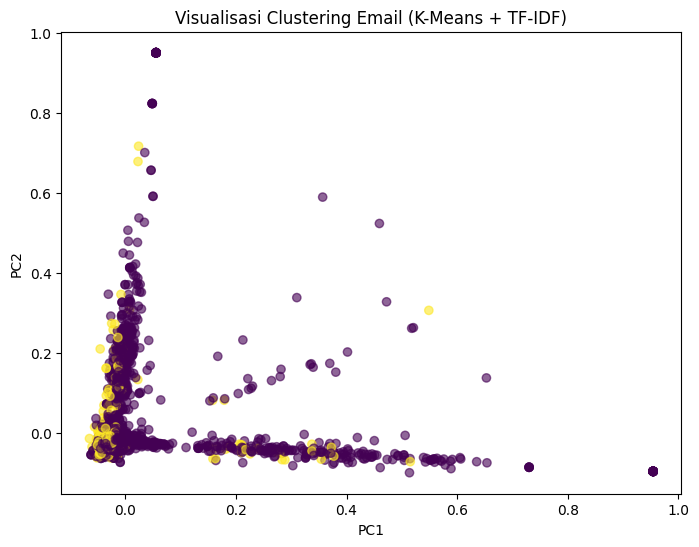

In [9]:
pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title("Visualisasi Clustering Email (K-Means + TF-IDF)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [15]:
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print(f"\nKata penting cluster {i}:")
    top_idx = kmeans.cluster_centers_[i].argsort()[-10:][::-1]
    print([terms[j] for j in top_idx])



Kata penting cluster 0:
['im', 'ok', 'ill', 'ur', 'just', 'come', 'got', 'free', 'time', 'sorry']

Kata penting cluster 1:
['ltgt', 'dont', 'know', 'good', 'day', 'let', 'love', 'hope', 'like', 'morning']
